# Переобучение многочленов

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")
#%matplotlib inline

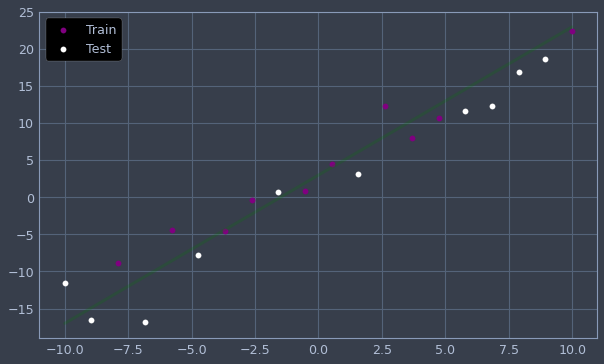

In [2]:
from jupyterthemes import jtplot

jtplot.style()
X = np.linspace(-10, 10, 20)
#print(X)

y = 2 * X + 3 + np.random.randn(20) * 3
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, label='Train', color='purple')
plt.scatter(X_test, y_test, label='Test', color='white')
plt.plot(X, 2 * X + 3, color='green', lw=3, alpha=0.2)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor('black')
legend_box.set_edgecolor('white')
plt.show()

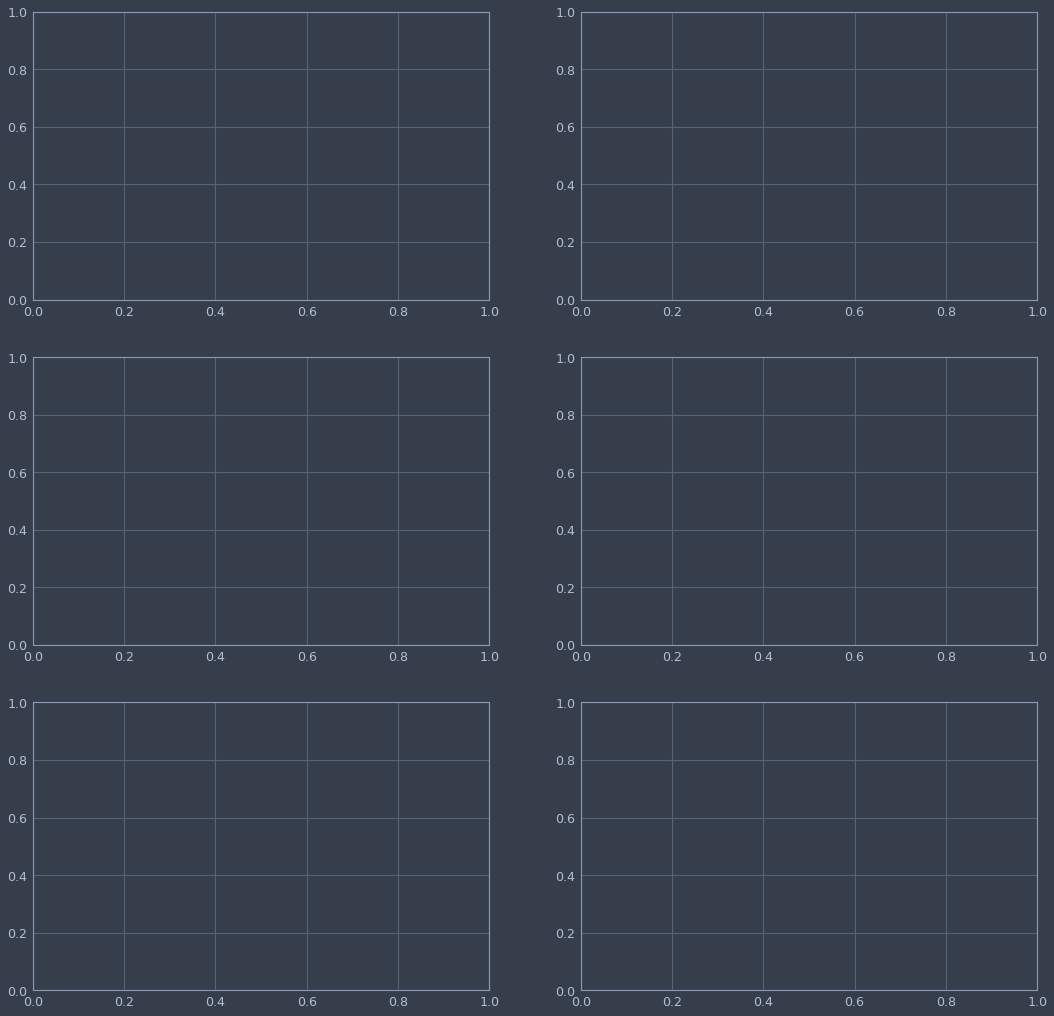

In [3]:
grid = np.linspace(-12, 12, 500)

fig, ax = plt.subplots(3, 2, figsize=(18, 18))

ax = ax.ravel()

for i, deg in enumerate([1, 3, 4, 7, 9, 20]):
    poly = np.polyfit


In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=', ')

In [5]:
# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss hours-per-week native-country salary')

#numeric_indices = np.array([0, 2, 4, 10, 11, 12])
#categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13])

df.columns = columns.split()

df = df.replace('?', np.nan)
df = df.dropna()

df['salary'] = df['salary'].apply((lambda x: x == '>50k'))

numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

numerical_data = df[numerical_cols] 
categorical_data = df[categorical_cols] 

In [6]:
df['education'].unique(), len(df['education'].unique())

(array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
        '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object),
 16)

# One-Hot Encoding

In [7]:
dummy_features = pd.get_dummies(categorical_data)
dummy_features

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
X = pd.concat([numerical_data, dummy_features], axis=1)
X_origin = df.iloc[:, :-1]
X.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
y = df['salary']
y.head()

0    False
1    False
2    False
3    False
4    False
Name: salary, dtype: bool

In [10]:
X.shape, X_origin.shape

((30161, 104), (30161, 14))

# Обучение модели

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

#### Напишем функцию, визуализирующую поиск оптимального гиперпараметра модели по сетке. Используем идею кросс-валидации.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            cv=5,
                            scoring='f1',
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15, 8))
        plt.title('choose' + param_name)
        
        if (param_scale == 'log'):
            plt.xscale('log')
            
        plt.plot(grid, means, label='mean values of score', color='red', lw=3)
        plt.fill_between(grid, means - 2 * error, means + 2 * error,
                         color='green', label='filled area between errors', alpha=0.5)
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]
param_scales = ['log', 'ordinary']

In [15]:
for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)
    

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START n_neighbors=4...............................................
[CV 1/5; 1/8] END ................n_neighbors=4;, score=0.000 total time=  13.2s
[CV 2/5; 1/8] START n_neighbors=4...............................................
[CV 2/5; 1/8] END ................n_neighbors=4;, score=0.000 total time=   7.8s
[CV 3/5; 1/8] START n_neighbors=4...............................................



KeyboardInterrupt



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm


max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []
    
    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]
    
    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]
    
    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_
    
    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)
        
        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))
    
    scores = np.array(scores)
    
    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

# Стекинг

In [20]:
from sklearn.model_selection import cross_val_predict

In [22]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')
        model.fit(X_train, y_train)
        return train_answers, model.predict_proba(X_test)
    except Exception:
        train_answer = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
models = []
models.append(KNeighborsClassifier(n_jobs=-1, n_neighbors=30))
models.append(LogisticRegression())
models.append(DecisionTreeClassifier(max_depth=8))

In [4]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

NameError: name 'np' is not defined

In [ ]:
from tqdm.notebook import tqdm

for model in models:
    train, test = compute_meta_feature(model, X_train, X_test, y_train, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_train = np.append(meta_features_test, test.reshape((train.size, 1)), axis=1)